A character-level model to generate examples of the things shown to it.

In [50]:
import pandas as pd

lets build a data pipeline to retrieve the names of dinosaurs from the dataset

In [51]:
column = 'Name'
with open('data/dinosaur.csv') as f:
    df = pd.read_csv(f)
    
    names = df[column].str.lower().to_list()
    
    print(names[0:10])
    
    with open('data/dinosaur.txt', 'w') as f:
        for name in names:
            f.write(name + '\n')
  
    

['aardonyx', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acanthopholis', 'achelousaurus', 'acheroraptor', 'achillesaurus', 'achillobator']


now lets work with the new dataset

In [52]:
names = open('data/dinosaur.txt').read().splitlines()

lets learn a bit more about this dataset

In [53]:
print("lenght of names: ", len(names))
print("first 10 names: ", names[0:10])
print("shortest name: ", min(names, key=len))
print("longest name: ", max(names, key=len))

lenght of names:  1154
first 10 names:  ['aardonyx', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acanthopholis', 'achelousaurus', 'acheroraptor', 'achillesaurus', 'achillobator']
shortest name:  kol
longest name:  micropachycephalosaurus


We will start by building a bigram model, it will be a simple character-level model that will predict the next character given the previous character.

Despite the fact that each word can be considered as a sequence of characters, and a pack of multiple examples in terms of the probabilistic structure to be modeled, we will start by just considering the next character prediction task.

lets take a look at this bigrams.

by adding the start of sequence and end of sequence token we are explicitly giving the model knwoledge of the start and end of the sequence.

In [54]:
for word in names[:1]:
  print("the word is: ", word)
  print("bigrams:")
  
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    print(ch1,ch2)

the word is:  aardonyx
bigrams:
<S> a
a a
a r
r d
d o
o n
n y
y x
x <E>


To learn the statistics of which characters follow which other characters, the bigram model doesit by simply counting the number of times each bigram occurs in the dataset.

In [55]:
counter = {}
  
for word in names:
  
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    bigram = (ch1,ch2)
    counter[bigram] = counter.get(bigram,0) + 1

In [56]:
print(counter.items())

dict_items([(('<S>', 'a'), 132), (('a', 'a'), 9), (('a', 'r'), 99), (('r', 'd'), 5), (('d', 'o'), 85), (('o', 'n'), 186), (('n', 'y'), 32), (('y', 'x'), 18), (('x', '<E>'), 30), (('a', 'b'), 21), (('b', 'e'), 22), (('e', 'l'), 80), (('l', 'i'), 64), (('i', 's'), 97), (('s', 'a'), 597), (('a', 'u'), 596), (('u', 'r'), 621), (('r', 'u'), 574), (('u', 's'), 731), (('s', '<E>'), 798), (('b', 'r'), 19), (('r', 'i'), 80), (('i', 'c'), 45), (('c', 't'), 10), (('t', 'o'), 223), (('o', 's'), 373), (('r', 'o'), 160), (('b', 'y'), 3), (('y', 'd'), 2), (('a', 'c'), 74), (('c', 'a'), 45), (('a', 'n'), 265), (('n', 't'), 57), (('t', 'h'), 63), (('h', 'o'), 82), (('o', 'p'), 136), (('p', 'h'), 55), (('o', 'l'), 40), (('c', 'h'), 121), (('h', 'e'), 54), (('l', 'o'), 126), (('o', 'u'), 21), (('e', 'r'), 143), (('o', 'r'), 157), (('r', 'a'), 213), (('a', 'p'), 68), (('p', 't'), 69), (('r', '<E>'), 76), (('h', 'i'), 51), (('i', 'l'), 38), (('l', 'l'), 28), (('l', 'e'), 48), (('e', 's'), 67), (('o', 'b'),

In [57]:
sorted(counter.items(),key=lambda kv: kv[1], reverse=True)

[(('s', '<E>'), 798),
 (('u', 's'), 731),
 (('u', 'r'), 621),
 (('s', 'a'), 597),
 (('a', 'u'), 596),
 (('r', 'u'), 574),
 (('o', 's'), 373),
 (('a', 'n'), 265),
 (('t', 'o'), 223),
 (('r', 'a'), 213),
 (('o', 'n'), 186),
 (('a', 't'), 163),
 (('r', 'o'), 160),
 (('o', 'r'), 157),
 (('n', 'o'), 145),
 (('e', 'r'), 143),
 (('o', 'p'), 136),
 (('i', 'a'), 135),
 (('<S>', 'a'), 132),
 (('t', 'a'), 129),
 (('l', 'o'), 126),
 (('a', 's'), 126),
 (('c', 'h'), 121),
 (('n', 'g'), 118),
 (('i', 'n'), 117),
 (('<S>', 's'), 107),
 (('a', '<E>'), 106),
 (('a', 'l'), 101),
 (('a', 'r'), 99),
 (('h', 'a'), 99),
 (('i', 's'), 97),
 (('c', 'e'), 94),
 (('e', 'n'), 92),
 (('n', 'a'), 91),
 (('<S>', 'c'), 86),
 (('d', 'o'), 85),
 (('h', 'o'), 82),
 (('e', 'l'), 80),
 (('r', 'i'), 80),
 (('n', '<E>'), 80),
 (('<S>', 'p'), 79),
 (('r', '<E>'), 76),
 (('t', 'e'), 76),
 (('<S>', 't'), 76),
 (('p', 's'), 75),
 (('a', 'c'), 74),
 (('i', 't'), 73),
 (('l', 'a'), 73),
 (('o', 'c'), 71),
 (('m', 'a'), 70),
 (('

we can see the most common bigrams in the dataset.
with this information we can point out that most names end with the letter s. as in 'saurus', and they are likely to start with an a

It will be more convenient to work with the bigram counts as a matrix, where the rows represent the first character of the bigram and the columns represent the second character of the bigram.

In [58]:
import torch



we need a look up table to translate each character into a unique index.

In [59]:
characters = sorted(list(set(''.join(names))))

lookup_table = {s:i for i,s in enumerate(characters)}
lookup_table['<S>'] = len(lookup_table)
lookup_table['<E>'] = len(lookup_table)
print(lookup_table)

{' ': 0, '/': 1, '0': 2, '1': 3, '4': 4, 'a': 5, 'b': 6, 'c': 7, 'd': 8, 'e': 9, 'f': 10, 'g': 11, 'h': 12, 'i': 13, 'j': 14, 'k': 15, 'l': 16, 'm': 17, 'n': 18, 'o': 19, 'p': 20, 'q': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'v': 26, 'w': 27, 'x': 28, 'y': 29, 'z': 30, '<S>': 31, '<E>': 32}


with it we can map each character to its index

In [60]:
vocab_size = len(lookup_table)
N = torch.zeros(vocab_size ,vocab_size, dtype=torch.int32)

In [61]:
for word in names:
  
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    N[ich1,ich2] += 1


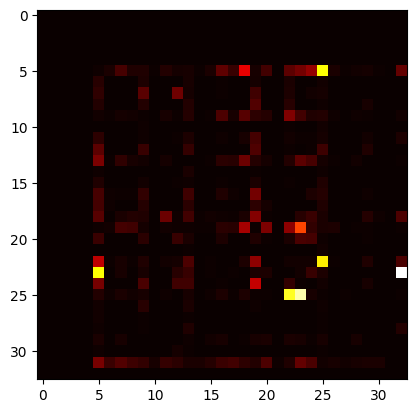

In [62]:
import matplotlib.pyplot as plt

plt.imshow(N, cmap='hot', interpolation='nearest')
plt.show()

lets create a better visualization of the bigram counts matrix

(-0.5, 32.5, 32.5, -0.5)

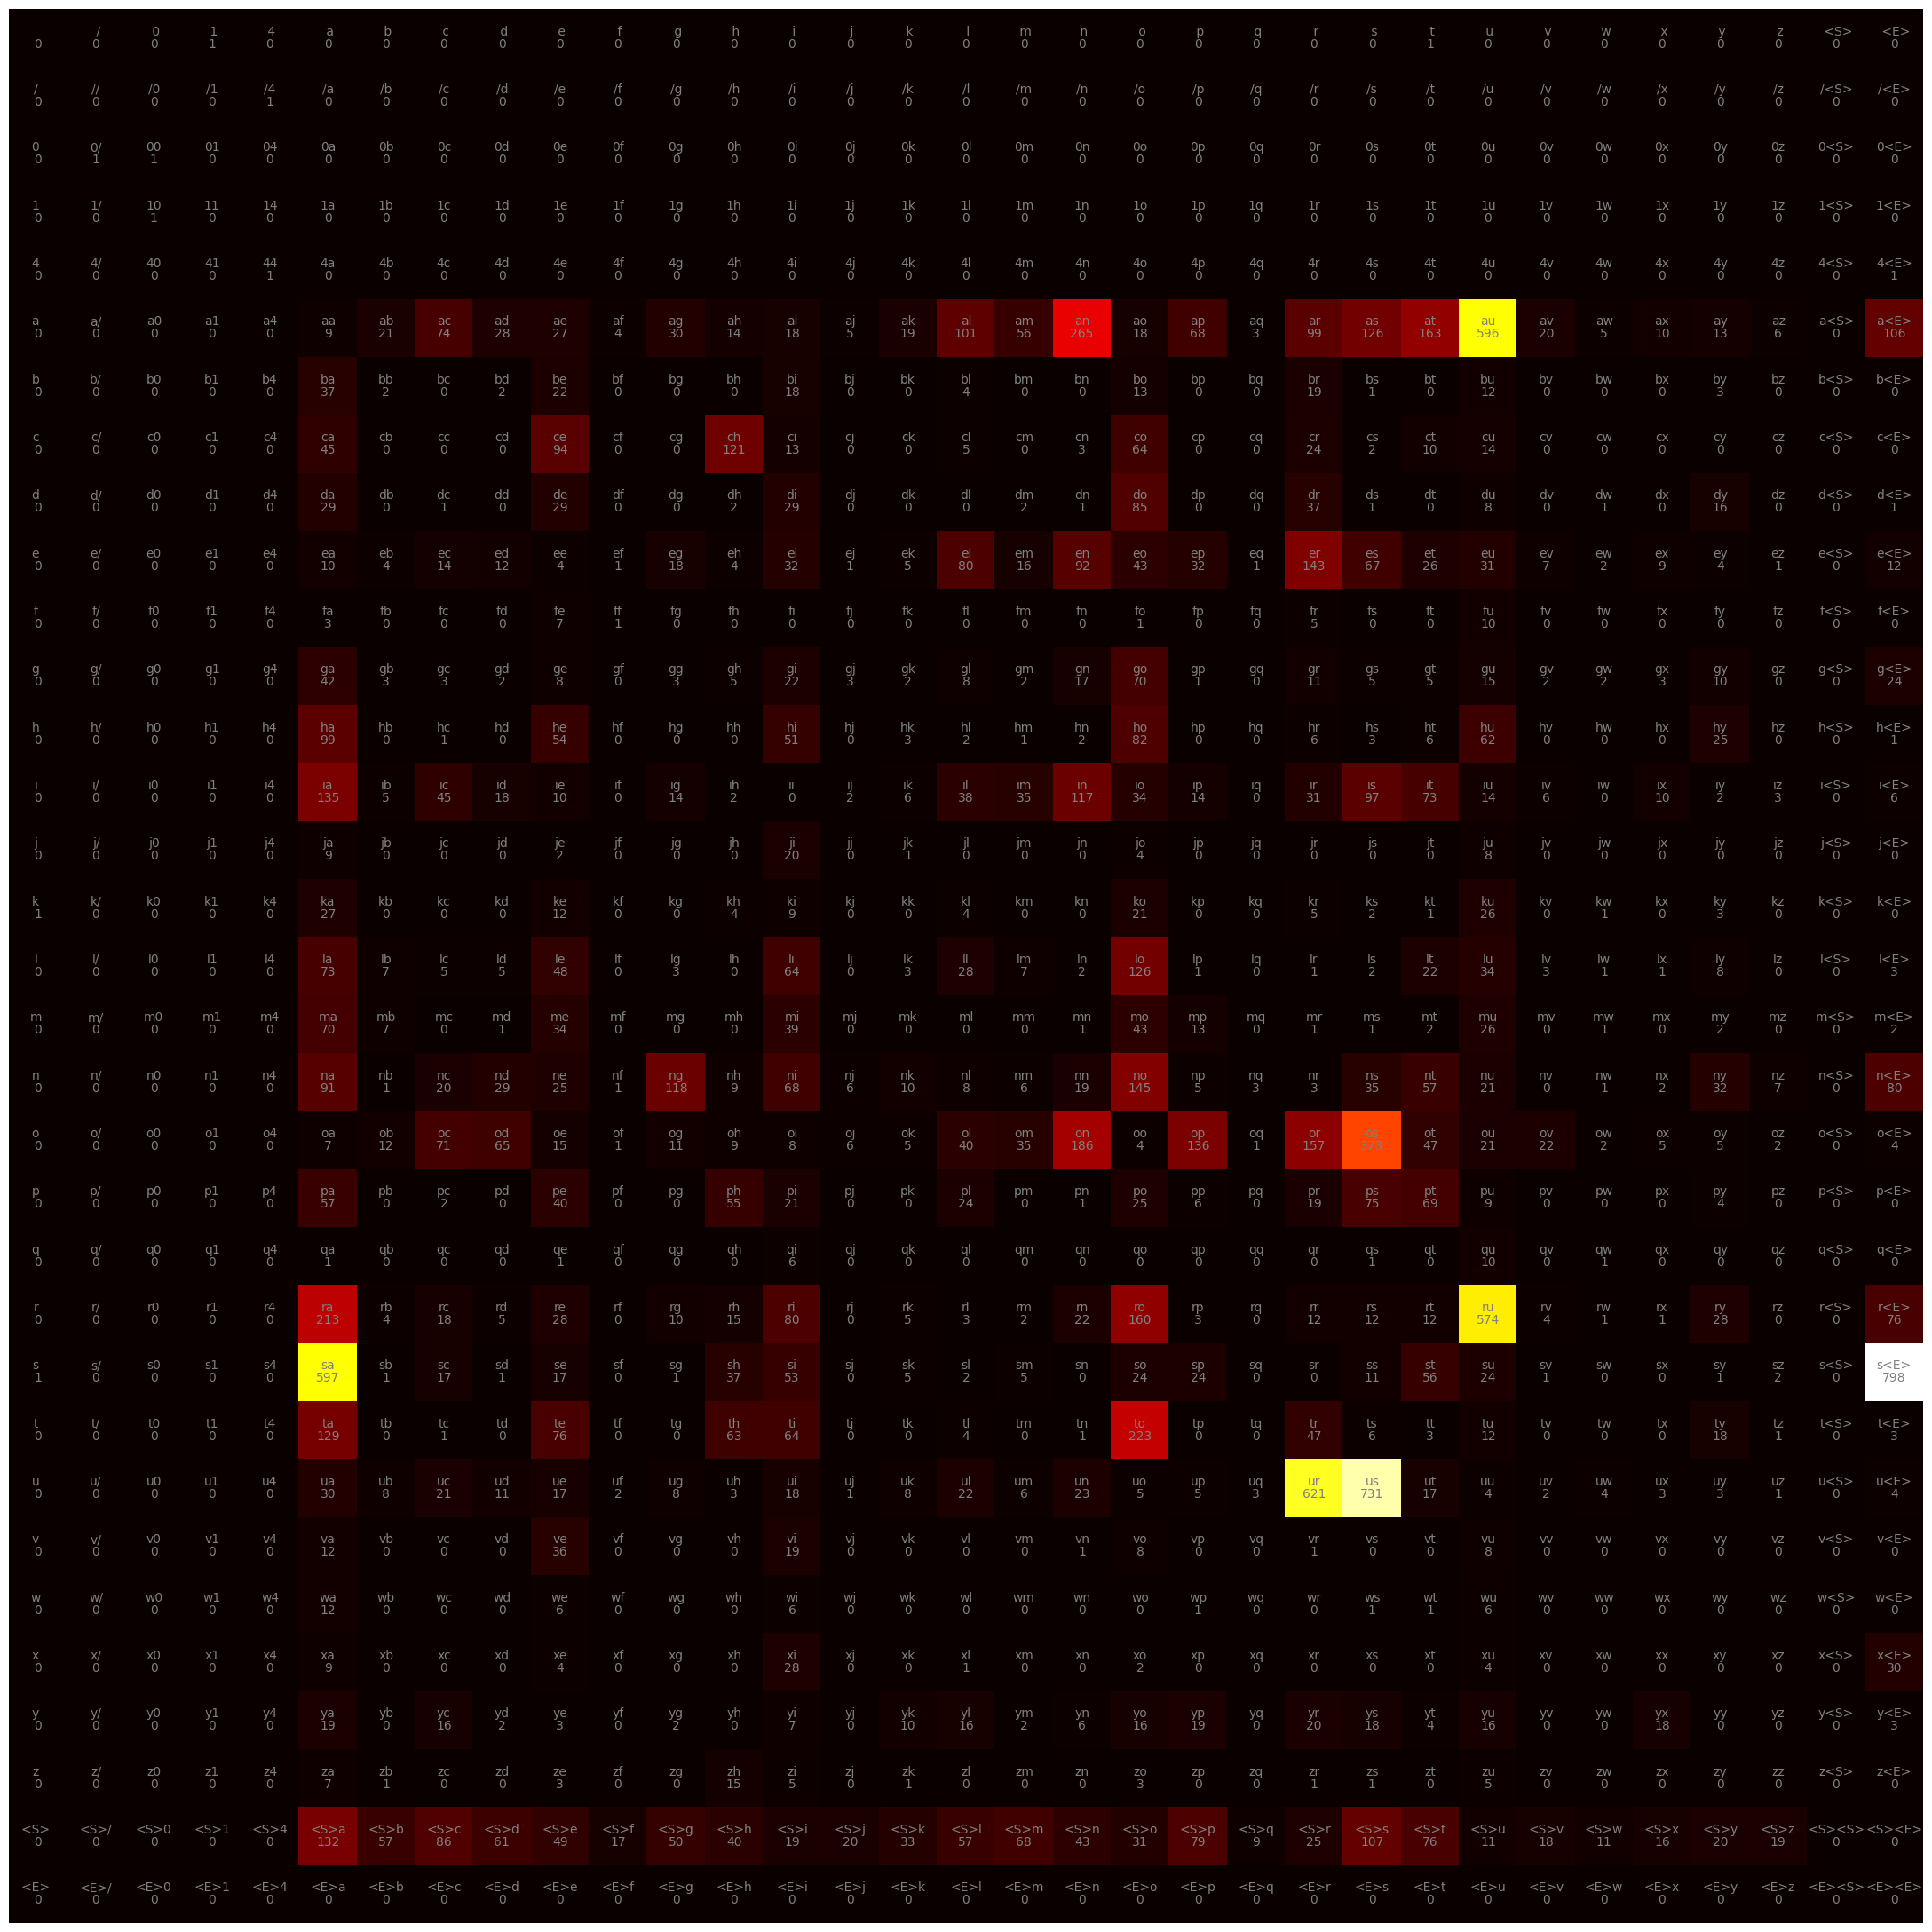

In [63]:
reversed_table = {i:s for s,i in lookup_table.items()}
plt.figure(figsize=(28,28))
plt.imshow(N, cmap='hot')
for i in range(vocab_size):
  for j in range(vocab_size):
    chstr = reversed_table[i] + reversed_table[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off')

In [64]:
N[len(lookup_table)-2,:]

tensor([  0,   0,   0,   0,   0, 132,  57,  86,  61,  49,  17,  50,  40,  19,
         20,  33,  57,  68,  43,  31,  79,   9,  25, 107,  76,  11,  18,  11,
         16,  20,  19,   0,   0], dtype=torch.int32)

We are going to convert the counts into a probability distribution by dividing each row by the sum of the row.

In [65]:
p = N[len(lookup_table)-2,:].float() / N[len(lookup_table)-2,:].sum()
print(p)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1144, 0.0494, 0.0745, 0.0529,
        0.0425, 0.0147, 0.0433, 0.0347, 0.0165, 0.0173, 0.0286, 0.0494, 0.0589,
        0.0373, 0.0269, 0.0685, 0.0078, 0.0217, 0.0927, 0.0659, 0.0095, 0.0156,
        0.0095, 0.0139, 0.0173, 0.0165, 0.0000, 0.0000])


Lets sample from this distribution using pytorch multinomial function.

To make this notebook deterministic we will use a generator object.

In [66]:
g = torch.Generator().manual_seed(42)

p = torch.rand(3,generator=g)

p = p/p.sum()

p

tensor([0.4047, 0.4197, 0.1756])

In [67]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2])

the mutinomial pytorch utility function gives us the ability to sample from a multinomial distribution. based on the probabilities we pass in. we create a probabilities tensor, and then we sample from it.Later we will use this function to sample from the bigram distribution.

In [68]:
p = N[len(lookup_table)-2,:].float() / N[len(lookup_table)-2,:].sum()
idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
print(idx,reversed_table[idx])

5 a


Now lets build the bigram model loop.

In [69]:
g = torch.Generator().manual_seed(42)

for i in range (10): # sample 10 names
  idx = len(lookup_table)-2 # <S>
  out = []
  while True:
    p = N[idx,:].float() / N[idx,:].sum() # probability distribution
    idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() # sample from distribution
    out.append(reversed_table[idx])
    if idx == len(lookup_table)-1: # <E>
      break
  print(''.join(out))
  

usauiausa<E>
yca<E>
ahtagxirurchus<E>
lanurs<E>
x<E>
dausangaururiteyamurgausophomopousaurausalalkus<E>
jus<E>
chanoroceintis<E>
machos<E>
cetorrururamopaus<E>


the thing is... bigram models are bad at generating text. they are not able to capture long range dependencies

Lets think in terms of a language model. how would an untrained model generate text?
We can easily see that it would generate gibberish. it would generate a sequence of characters that are not likely to appear in the dataset.All we have to do is to make the probability of the next character of the sequence to be equally likely

In [70]:
# g = torch.Generator().manual_seed(2)

# for i in range (1): # sample 10 names
#   idx = len(lookup_table)-2 # <S>
#   out = []
#   while True:
#     p = torch.ones(32) / 32.0 # probability distribution
#     idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() # sample from distribution
#     out.append(reversed_table[idx])
#     print(out)
#     if idx == len(lookup_table)-1: # <E>
#       break
#   print(''.join(out))
  
# #! very likely not to stop

We now need a quantity of how good the model is 

First we are going to compute the probability of the next character given the previous character. we will use the bigram counts matrix to compute this probability.

In [71]:
P = N.float()
P /= P.sum(1,keepdims=True)

In [72]:
for word in names[:3]:
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    prob = P[ich1,ich2]
    print(f'{ch1}{ch2} : {prob}')

<S>a : 0.11438474804162979
aa : 0.004726890940219164
ar : 0.05199579894542694
rd : 0.003881987649947405
do : 0.3512396812438965
on : 0.14880000054836273
ny : 0.03990025073289871
yx : 0.09137056022882462
x<E> : 0.38461539149284363
<S>a : 0.11438474804162979
ab : 0.011029412038624287
be : 0.1654135286808014
el : 0.11922504007816315
li : 0.14317673444747925
is : 0.13528591394424438
sa : 0.355780690908432
au : 0.31302520632743835
ur : 0.392789363861084
ru : 0.44565218687057495
us : 0.46236559748649597
s<E> : 0.47556614875793457
<S>a : 0.11438474804162979
ab : 0.011029412038624287
br : 0.1428571492433548
ri : 0.06211180239915848
ic : 0.06276150792837143
ct : 0.025316456332802773
to : 0.3425499200820923
os : 0.29840001463890076
sa : 0.355780690908432
au : 0.31302520632743835
ur : 0.392789363861084
ru : 0.44565218687057495
us : 0.46236559748649597
s<E> : 0.47556614875793457


how can we summarize these probabilities into a single number that expresses the quality of the model? we can use the log-likelihood of the sequence. it is the product of the probabilities of each character in the sequence.

For convenience we will use the log-likelihood of the sequence. Bue because we are looking of a loss function we will use the negative log-likelihood.

At the end we will use the average of the computed loss to get a single number that expresses the quality of the model.

In [73]:
log_likelihood = 0.0
n = 0
for word in names[:3]:
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    n += 1
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    prob = P[ich1,ich2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    print(f'{ch1}{ch2} : {logprob}')

nll = -log_likelihood
print(nll)
print(nll/n)

<S>a : -2.1681876182556152
aa : -5.354487419128418
ar : -2.956592321395874
rd : -5.551407814025879
do : -1.0462864637374878
on : -1.9051522016525269
ny : -3.221372604370117
yx : -2.392832040786743
x<E> : -0.9555114507675171
<S>a : -2.1681876182556152
ab : -4.507189750671387
be : -1.7993067502975464
el : -2.126742362976074
li : -1.9436755180358887
is : -2.0003647804260254
sa : -1.0334408283233643
au : -1.1614716053009033
ur : -0.9344817996025085
ru : -0.8082164525985718
us : -0.7713993787765503
s<E> : -0.7432492971420288
<S>a : -2.1681876182556152
ab : -4.507189750671387
br : -1.945910096168518
ri : -2.7788193225860596
ic : -2.7684133052825928
ct : -3.676300525665283
to : -1.0713379383087158
os : -1.209320306777954
sa : -1.0334408283233643
au : -1.1614716053009033
ur : -0.9344817996025085
ru : -0.8082164525985718
us : -0.7713993787765503
s<E> : -0.7432492971420288
tensor(71.1273)
tensor(2.0322)


Our goal is to maximize the likelihood of the data with respect to the model parameters. which is the product of the probabilities of each character in the sequence assigned by the model.

maximizing the likelihood is the same as maximizing the log-likelihood. because the log function is a monotonically increasing function. its just scaling the values.

maximizing the log-likelihood is the same as minimizing the negative log-likelihood.In practice we will use the negative log-likelihood as our loss function.

Take a look at this code cell, the las bigram analyzed by the model shows an error of infinity with a probability of 0 this means that during training it never happened that the bigram representing finishing a dinosaurs name with a q happened. This is undesirable because the model will never generate a word like this. to fix this wi will work on model smoothing.

In [74]:
log_likelihood = 0.0
n = 0
for word in ['alejoq']:
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    n += 1
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    prob = P[ich1,ich2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    print(f'{ch1}{ch2} : {logprob}')

nll = -log_likelihood
print(nll)
print(nll/n)

<S>a : -2.1681876182556152
al : -2.936591625213623
le : -2.2313575744628906
ej : -6.5087690353393555
jo : -2.397895336151123
oq : -7.130898952484131
q<E> : -inf
tensor(inf)
tensor(inf)


In [75]:
P = (N+1).float() # add-one smoothing to avoid zero probabilities
P /= P.sum(1,keepdims=True)

Up to this point we have been working with a bigram language model. we constructed the bigrams from the names dataset and then trained the model based on the occurrence of each bigram in the dataset. we then normalized the rows of the bigram counts matrix to get a probability distribution over the possible next characters given the previous character.
Also we used the same parameters of this model to generate nwe words by sampling from the probability distribution.
Finally we built a way to asses the quality of the model by computing the negative log-likelihood of the data with respect to the model.

Now we will cast the same problem but in terms of the neural network framework. We are going to end ina very similar position but with a different approach.

## next-character-NN-model

lets create the training set

In [76]:
xs,ys = [],[] # input and target from the bigrams (x,y)
for word in names[:1]:
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    xs.append(ich1)
    ys.append(ich2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

if we take a look at the tensors we can see they are made up by the integers index values of each character in the dataset.

In [77]:
print(xs,ys)

tensor([31,  5,  5, 22,  8, 19, 18, 29, 28]) tensor([ 5,  5, 22,  8, 19, 18, 29, 28, 32])


Due to the nature of NN it is more convenient to one-hot encode the characters.

In [78]:
import torch.nn.functional as F

In [79]:
xenc = F.one_hot(xs,vocab_size).float()
yenc = F.one_hot(ys,vocab_size).float()

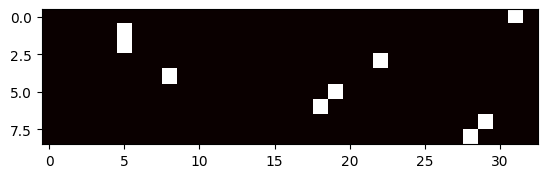

In [80]:
plt.imshow(xenc, cmap='hot')

lets init the weights of the model sampling from a normal distribution

this little example using only one word gives use a better idea of how the model works. the output of the broadcasting between the input and the weights is the probability distribution of the next character. based on the word used as input.

In [81]:
W = torch.randn((vocab_size,1))

xenc @ W  #9,33 @ 33,1

tensor([[ 0.6658],
        [-0.5687],
        [-0.5687],
        [-0.4537],
        [ 2.4754],
        [-0.2357],
        [ 1.3661],
        [ 0.9493],
        [ 0.6189]])

We will use 33 neurons on our final models 

In [82]:
W = torch.randn((vocab_size,vocab_size))
xenc @ W #9,33 @ 33,33

tensor([[ 1.0376e+00, -1.4939e+00, -1.0839e+00, -3.2254e-02, -7.6759e-01,
         -1.0307e+00, -1.9078e+00, -1.3560e-01, -3.8267e-03, -1.0744e+00,
         -3.8792e-01, -2.4910e-01, -5.5355e-02, -1.1180e+00, -1.9071e-01,
          8.2919e-01, -1.7942e+00,  8.1633e-01,  8.2740e-02,  3.0521e-01,
          1.0659e+00,  1.8006e+00,  1.0321e+00, -1.8841e+00, -3.7456e-01,
         -1.2095e+00, -2.2657e+00, -2.4677e+00,  1.1693e+00, -9.2229e-01,
          7.1070e-01, -8.3966e-01, -5.7325e-01],
        [ 8.7841e-02,  1.5777e+00,  8.5647e-01,  6.6546e-01, -1.0474e+00,
          5.7215e-02, -1.4360e-01,  2.0405e+00,  6.1693e-01, -4.8421e-01,
         -2.6312e-03, -9.1427e-01,  8.6175e-01,  8.5185e-01,  9.4602e-01,
          1.0876e+00, -9.5449e-02,  4.2747e-01, -1.2331e+00, -2.1498e-01,
         -1.9647e+00,  2.0976e-01, -1.6426e+00, -6.0541e-01,  1.1144e+00,
          3.6785e-01, -5.7498e-01,  2.8111e-01,  2.2531e+00,  7.0673e-01,
          1.2560e+00,  2.6691e-01,  5.8108e-01],
        [ 8.78

This gives use the firing rate of each neuron for each input character.

In [83]:
(xenc @ W)[3,13] #the probability of the 4th input on the 13th neuron

tensor(0.3334)

to demostrate better the dot product lets do it "by hand"

In [84]:
(xenc[3] * W[:,13]).sum() #take the 4th input and the 13th neuron and multiply element wise, then sum

tensor(0.3334)

Our model will consist on a simply linear layer with no non-linearities. We do need to have 33 output neurons.Lets talk about the semantics of this outputs 

we want the outputs to represent a probability distribution over the possible next characters. we do not get the counts out of the neurons as we used them in the past example, also we do not get probabilities. we could use a softmax function to turn this float values into probabilities. but we will use a different approach. What we get as an output are log counts. we are going to take advanage of the exponential function to turn this log counts into counts. and then we will normalize the counts to get probabilities.

In [85]:
logits = xenc @ W # log counts 
counts = logits.exp() # equivalent to N matrix
probs = counts / counts.sum(1,keepdims=True) # normalize to get probabilities

In [86]:
probs[0].sum()

tensor(1.0000)

In [87]:
probs.shape

torch.Size([9, 33])

by interpreting the raw outputs as log counts and exponentiating them we get positive numbers, those who were negative now are very close to 0 but positive, and those who were positive are now bigger.

In [89]:
nlls = torch.zeros(9)

for i in range(9):
  x = xs[i].item() # input character index
  y = ys[i].item() # target character index
  
  print('------')
  
  print(f'bigram example {i+1}: {reversed_table[x]}{reversed_table[y]} indexes: {x},{y}')
  print(f'input to the NN: {x}')
  print(f'output probabilities from the NN: {probs[i]}')
  print(f'label (actual next character index):{y}')
  p = probs[i,y]
  print(f'probabilitie assigned to the next character by the network: {p.item()}')
  logp = torch.log(p)
  print(f'log likelihood of the next character: {logpitem()}')
  nll = -logp
  print(f'negative log likelihood: {nll.item()}')
  nlls[i] = nll
  

print(f'=======')
print(f'average negative log likelihood: {nlls.mean().item()}')
  


------
bigram example 1: <S>a indexes: 31,5
input to the NN: 31
output probabilities from the NN: tensor([0.0743, 0.0059, 0.0089, 0.0255, 0.0122, 0.0094, 0.0039, 0.0230, 0.0262,
        0.0090, 0.0179, 0.0205, 0.0249, 0.0086, 0.0218, 0.0603, 0.0044, 0.0595,
        0.0286, 0.0357, 0.0764, 0.1593, 0.0739, 0.0040, 0.0181, 0.0079, 0.0027,
        0.0022, 0.0847, 0.0105, 0.0536, 0.0114, 0.0148])
label (actual next character index):5
probabilitie assigned to the next character by the network: 0.009390288032591343
log likelihood of the next character: -4.668079376220703
negative log likelihood: 4.668079376220703
------
bigram example 2: aa indexes: 5,5
input to the NN: 5
output probabilities from the NN: tensor([0.0169, 0.0751, 0.0365, 0.0302, 0.0054, 0.0164, 0.0134, 0.1193, 0.0287,
        0.0096, 0.0155, 0.0062, 0.0367, 0.0363, 0.0399, 0.0460, 0.0141, 0.0238,
        0.0045, 0.0125, 0.0022, 0.0191, 0.0030, 0.0085, 0.0472, 0.0224, 0.0087,
        0.0205, 0.1475, 0.0314, 0.0544, 0.0202, 0.02

Whats important here is that we already count with a loss function, constructed by diferenciable parameters only, the negative log-likelihood. we can use it to train the model using gradient descent to minimize it.
training is the process where we are going to adjust the values on the W matrix in such a way that the nll is minimized.

lest start by defining the steps of a forward pass

In [91]:
g = torch.Generator().manual_seed(42)
W = torch.randn((vocab_size,vocab_size),generator=g,requires_grad=True)

In [103]:
xenc = F.one_hot(xs,vocab_size).float() # one-hot encoding of the input
logits = xenc @ W # log counts 
counts = logits.exp() # equivalent to N matrix
probs = counts / counts.sum(1,keepdims=True) # normalize to get probabilities
loss = -probs[torch.arange(9),ys].log().mean() # negative log likelihood

using the one hot encoded input, we can compute the dot product between de input feature sand the weight matrix , with this we get the logits (raw NN outputs) we will interpret them as as a log count, just to exponentiate them and get the actual representation of the counts, this is just a mathematical resource in order to comply with the definition of our loss function that we are using in our architecture, the softmax function. although we are not using it explicitly, we are using it implicitly by exponentiating the logits.

Now with the backward pass

In [104]:
W.grad = None # reset gradients set it to zero
loss.backward() # backpropagate

In [94]:
W.grad 

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0101, 0.0006, 0.0055,  ..., 0.0046, 0.0020, 0.0021],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [105]:
W.data += -0.1 * W.grad.data # update the parameters

In [106]:
print(loss.item())

3.65279483795166


we are going to print the loss value and then recalculate the forward pass to see it changing.W now are doing gradient descent.

## An Actual optimization loop

In [112]:
#! Create the dataset 
xs,ys = [],[] # input and target from the bigrams (x,y)
for word in names:
  seq = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(seq,seq[1:]):
    ich1 = lookup_table[ch1]
    ich2 = lookup_table[ch2]
    xs.append(ich1)
    ys.append(ich2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples ', num)

#! Initialize the model
g = torch.Generator().manual_seed(42)
W = torch.randn((vocab_size,vocab_size),generator=g,requires_grad=True)


number of examples  14879


training loop

In [114]:
epochs = 100
lr = 50
for k in range(epochs):
  
  #forward pass
  xenc = F.one_hot(xs,vocab_size).float() # one-hot encoding of the input
  logits = xenc @ W # log counts
  counts = logits.exp() # equivalent to N matrix
  probs = counts / counts.sum(1,keepdims=True) # normalize to get probabilities
  loss = -probs[torch.arange(num),ys].log().mean() # negative log likelihood
  print(f'epoch {k+1} loss: {loss.item()}')
  
  #backward pass
  W.grad = None # reset gradients set it to zero
  loss.backward() # backpropagate
  
  #update parameters
  W.data += -lr * W.grad.data # update the parameters
  

epoch 1 loss: 2.200591802597046
epoch 2 loss: 2.201906681060791
epoch 3 loss: 2.199894666671753
epoch 4 loss: 2.201225996017456
epoch 5 loss: 2.199225664138794
epoch 6 loss: 2.2005703449249268
epoch 7 loss: 2.198580265045166
epoch 8 loss: 2.199937343597412
epoch 9 loss: 2.197957992553711
epoch 10 loss: 2.199328899383545
epoch 11 loss: 2.1973607540130615
epoch 12 loss: 2.198742628097534
epoch 13 loss: 2.1967835426330566
epoch 14 loss: 2.1981749534606934
epoch 15 loss: 2.1962244510650635
epoch 16 loss: 2.197627544403076
epoch 17 loss: 2.1956849098205566
epoch 18 loss: 2.197097063064575
epoch 19 loss: 2.1951634883880615
epoch 20 loss: 2.1965856552124023
epoch 21 loss: 2.194659471511841
epoch 22 loss: 2.196091413497925
epoch 23 loss: 2.19417142868042
epoch 24 loss: 2.1956114768981934
epoch 25 loss: 2.193697929382324
epoch 26 loss: 2.195146083831787
epoch 27 loss: 2.193241596221924
epoch 28 loss: 2.1946985721588135
epoch 29 loss: 2.1927988529205322
epoch 30 loss: 2.194263458251953
epoch 31 

when W are all equal or specially close to 0  the probability distribution is uniform, making it so that the model aims to have weights close to 0 is a form of regularization, this is equivalent to label smoothing.
we are going to add an small component to the loss function that will penalize the model in order to get a uniform distribution.

In [115]:
epochs = 100
lr = 50
reg_rate = 0.01
for k in range(epochs):
  
  #forward pass
  xenc = F.one_hot(xs,vocab_size).float() # one-hot encoding of the input
  logits = xenc @ W # log counts
  counts = logits.exp() # equivalent to N matrix
  probs = counts / counts.sum(1,keepdims=True) # normalize to get probabilities
  loss = -probs[torch.arange(num),ys].log().mean() + reg_rate * (W**2).mean()# negative log likelihood
  print(f'epoch {k+1} loss: {loss.item()}')
  
  #backward pass
  W.grad = None # reset gradients set it to zero
  loss.backward() # backpropagate
  
  #update parameters
  W.data += -lr * W.grad.data # update the parameters

epoch 1 loss: 2.2049098014831543
epoch 2 loss: 2.206615686416626
epoch 3 loss: 2.2048423290252686
epoch 4 loss: 2.2064261436462402
epoch 5 loss: 2.2046239376068115
epoch 6 loss: 2.2062137126922607
epoch 7 loss: 2.2044389247894287
epoch 8 loss: 2.206054925918579
epoch 9 loss: 2.204301595687866
epoch 10 loss: 2.20593523979187
epoch 11 loss: 2.2041916847229004
epoch 12 loss: 2.2058329582214355
epoch 13 loss: 2.204094171524048
epoch 14 loss: 2.2057390213012695
epoch 15 loss: 2.204000473022461
epoch 16 loss: 2.2056453227996826
epoch 17 loss: 2.203909397125244
epoch 18 loss: 2.2055537700653076
epoch 19 loss: 2.203819513320923
epoch 20 loss: 2.2054662704467773
epoch 21 loss: 2.203733444213867
epoch 22 loss: 2.2053797245025635
epoch 23 loss: 2.203648328781128
epoch 24 loss: 2.205296516418457
epoch 25 loss: 2.2035655975341797
epoch 26 loss: 2.2052135467529297
epoch 27 loss: 2.203484535217285
epoch 28 loss: 2.205134153366089
epoch 29 loss: 2.2034058570861816
epoch 30 loss: 2.20505690574646
epoch

this component amis to have a W matrix of zeroes, think of it as adding a gravity force pushing the W to be uniform but we still need to match the data distribution

lets sample from the NN character level model

In [120]:
g = torch.Generator().manual_seed(42)

for i in range (10): # sample 10 names
  idx = len(lookup_table)-2 # <S>
  out = []
  while True:
    xenc = F.one_hot(torch.tensor([idx]),vocab_size).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdims=True)
    idx = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
    out.append(reversed_table[idx])
    if idx == len(lookup_table)-1: # <E>
      break
  print(''.join(out))

usauiausa<E>
yca<E>
ahtagxirusas<E>
usaphursa<E>
cas<E>
cangauhusateyamusachamemomopousaurausalalkusataveolonoroceintis<E>
machos<E>
cetorusausamopaus<E>
rcodirosaaetenguyniaus<E>
nexis<E>
